# 결측치와 누락값 & 이상치

### 데이터 분석에서 결측치와 누락값은 정말 중요한 포인트
- 결측치 : 실제 Na 값이지만 정말 Na값일 수 있음. (문자 Na 값일 수도 있다는 뜻)
- 결측치가 정말 순수하게 결측치의미인가 아니면 na값 자체가 값일 수 있는 것
- 누락값 : 휴먼에러로 인한 누락값, 어떤 이유로 누락이 되었는지 확인
- 값이 없다. NA, NaN 데이터에 보일 것

- 결측치&누락값 처리해야하는 이유
- 분석에 방해가 됨. na값이 정말 그 값이면 방해보다는 인사이트가 될 수 있음
- na 결측치, 누락값이라 생각한다면 -> 방해가 된다는 것은 머신에게 학습 시키기 위함
- na값을 -> 머신에게 학습시키기 위해 처리

- na값이 중요한 이유
- 시험성적데이터 [100,50,60,30,50,30] 이 데이터에선 평균을 알 수 있지만
- 시험성적데이터 [100,50,x,x,50,30] 이 데이터에선 누락이 되어 평균을 알 수 없음

- x값이 누락값이 실제의 값과 가장 유사하게 대입되면 가장 실제값과 예측값이 같아지는 것

- 결측치를 실제값과 유사하지 않게 적는다면 -> 결국에는 차이가 발생할 것이고 모델의 성능에도 영향을 미치게 될 것

- 결측치를 처리하는 방법
------
- 1. 가장 간단한 건 버리는 경우
    - 결측치를 버리는 기준은 결측치가 전체 비중에 1%미만 정도면 쉽게 버릴 수 있음. 하지만 절대값에 따라 달라질 수 있음.

- 2. 결측치가 상당한 비중을 차지하는 경우, 만약 전체 데이터 셋 컬럼에서 30% 40% 결측치가 있을 때
    - 결측치를 어떤 기준으로 처리해야 하는지
    - 다 버린다 -> 머신에게 학습할 데이터양 줄어드는 것 
    - 성능에 영향을 미칠 수 있음 
    - 결측치를 최대한 채워서 메꾸는 형식을 생각해야함
    
- 3. 데이터의 대부분이 결측치면 그건 날려도 상관 없음. 80~90% 다 결측치 컬럼이면 비즈니스적인 이해관계를 보고 도메인지식 이용해서 날려야 함
    - 결측치를 채울 수 없을 경우에 한해서
    
--- 

- 결측치가 이렇게 많은 컬럼에서 단순하게 접근해서 결측치를 대체한다면 평균으로만 대체한다면 -> 예시로 기온데이터라고 한다면 날씨는 계절에 대한 영향을 받음
- 단순하게 평균으로만 하면 -> 문제가 발생할 수 있음

- 결측치는 정말 다양하게 고민하고 도메인, 통계적으로 다방면 고민해야 함


- 결측치를 나타내는 용어
- 완전 무작위 결측치 MCAR ( Missing Completely at Random) 완전 무작위 -> 어떤 인간의 편향이나 기계 결함이 아니라 완전 무작위 랜덤한 것
- 무작위 결측 MAR( Missing at Random ) 어떤 상황으로 인해서 발생하는 경우, 기업에서 제조과정에서 A제조공정 B제조공정 중 A가 갑자기 문제가 발생해서 결측치가 발생 A공정에만 문제가 발생한 결측치 
- 비무작위 결측 NMAR( Missing at Not random) 결측값인데 정말 na가 하나의 특성이 될 수 있다 서베이 -> 소득에 대한 서베이 하면 자신의 소득을 밝히기 어려울 경우 na 로 처리

### 결측치 처리 방법
- 결측치를 버리고 제외하고 진행
- 평균, 중위값, 등등 어떤 특정 통계 값으로 대체 
- 보간법 (interpolation) 
- 대부분 보간법에 좀 많은 시간을 보낼 것
- 선형보간 Spline 보간법, time 시계열 보간법 등등

In [ ]:
pip install missingno

In [2]:
## 데이터 불러와서 결측치 보기

import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv('bike_sharing_daily.csv')
dfe = pd.read_csv('country_timeseries.csv')

In [6]:
df.isna().sum() #na값 확인

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

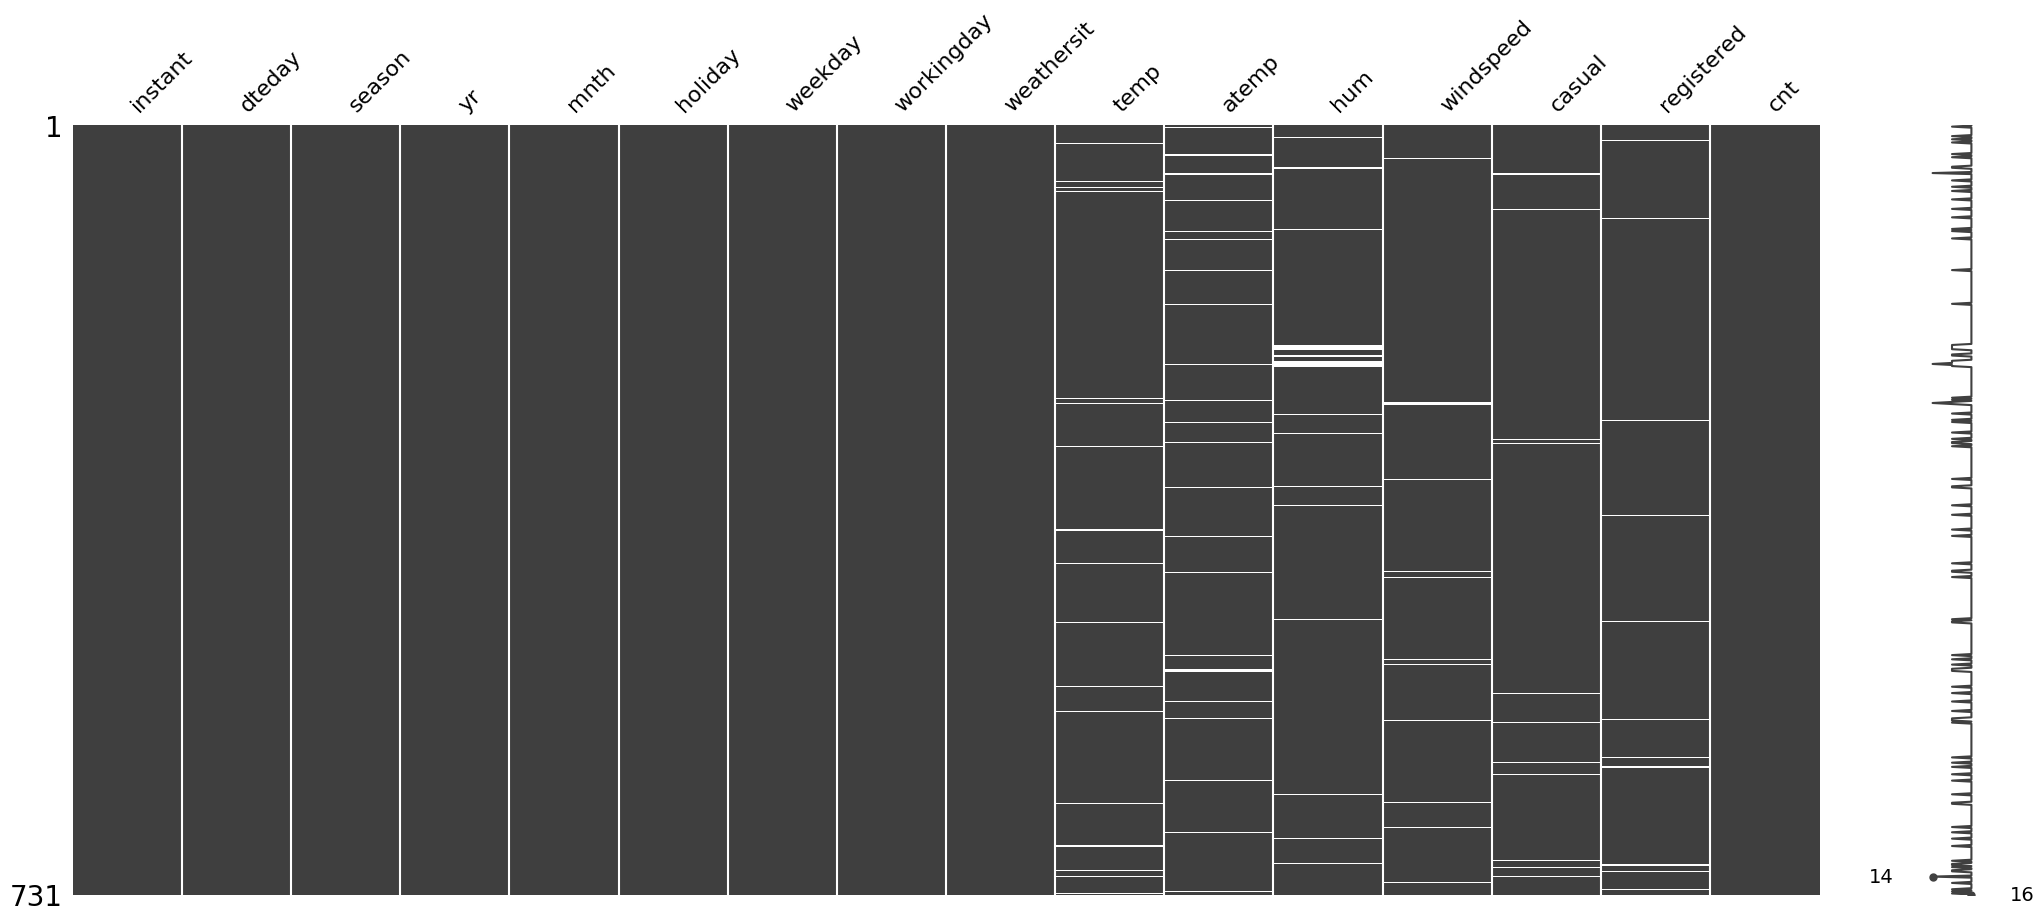

In [7]:
#결측치 시각화
msno.matrix(df)
plt.show()
# 흰색의 부분이 결측치

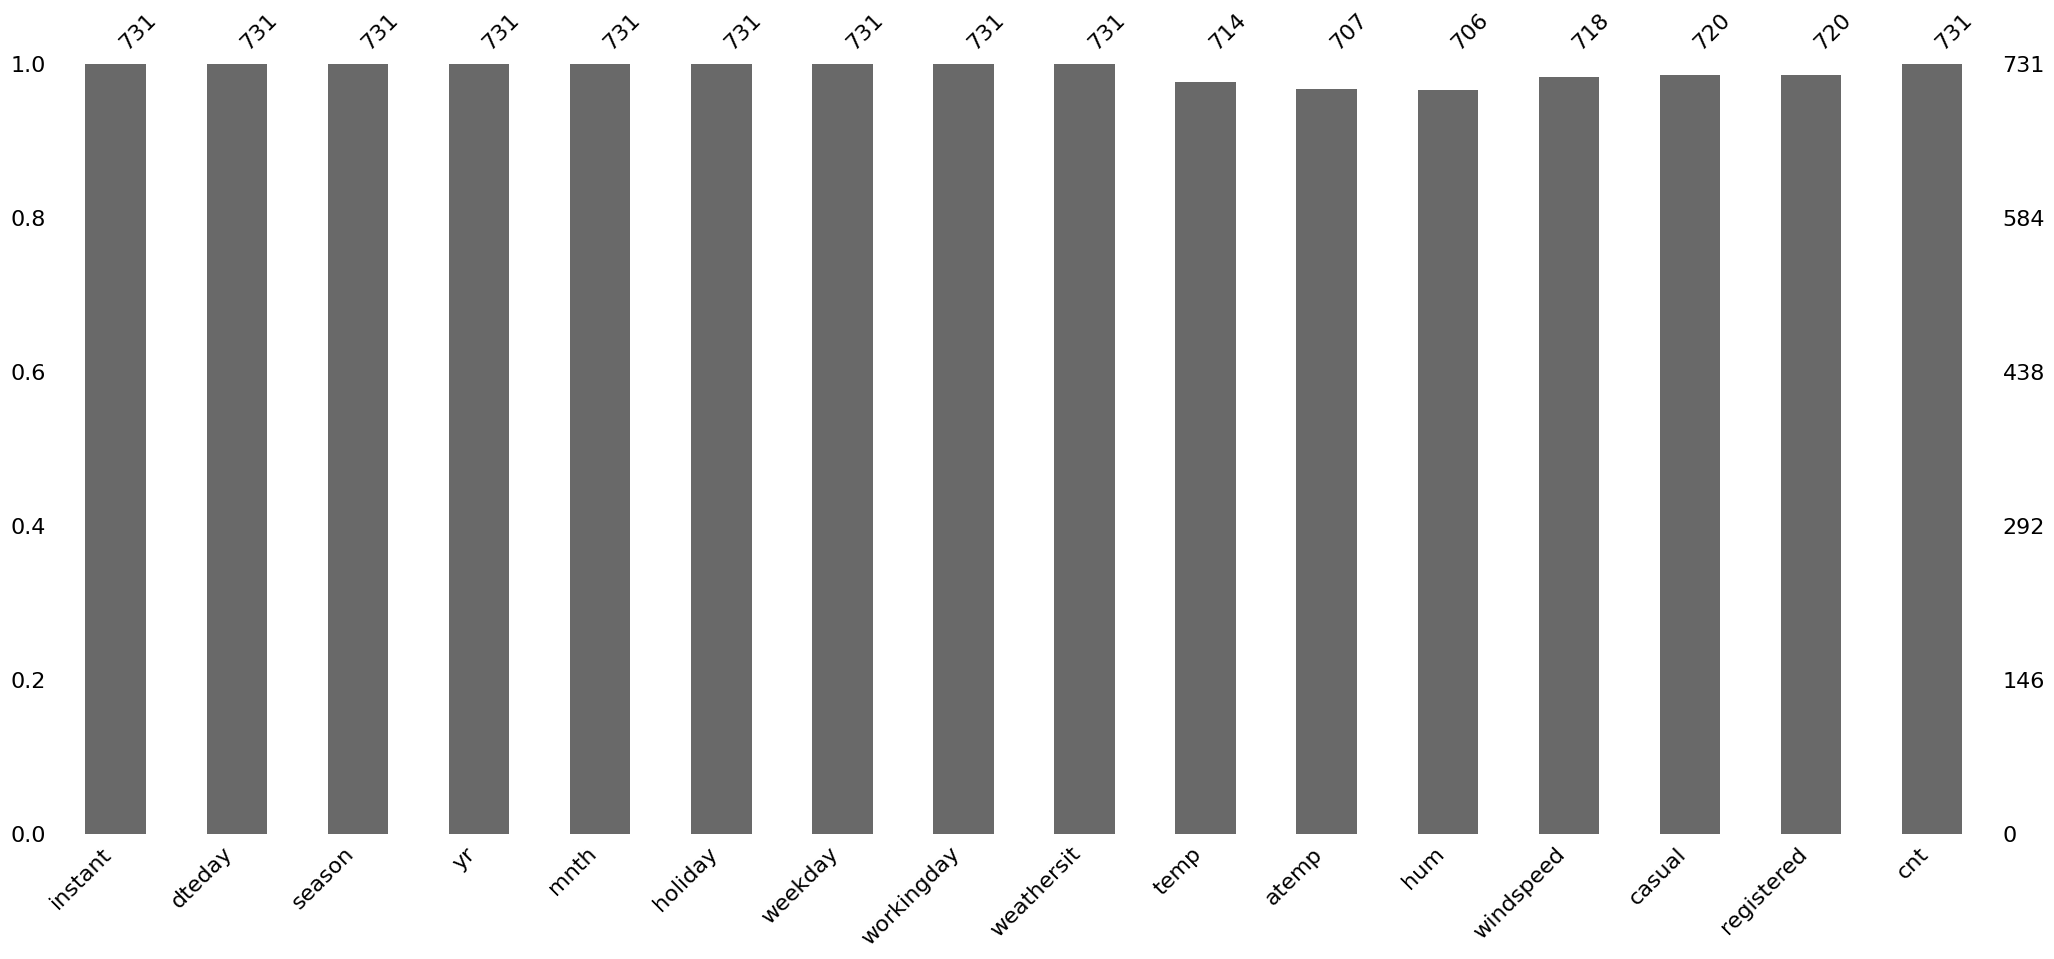

In [8]:
#막대그래프

msno.bar(df)
plt.show()

In [10]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


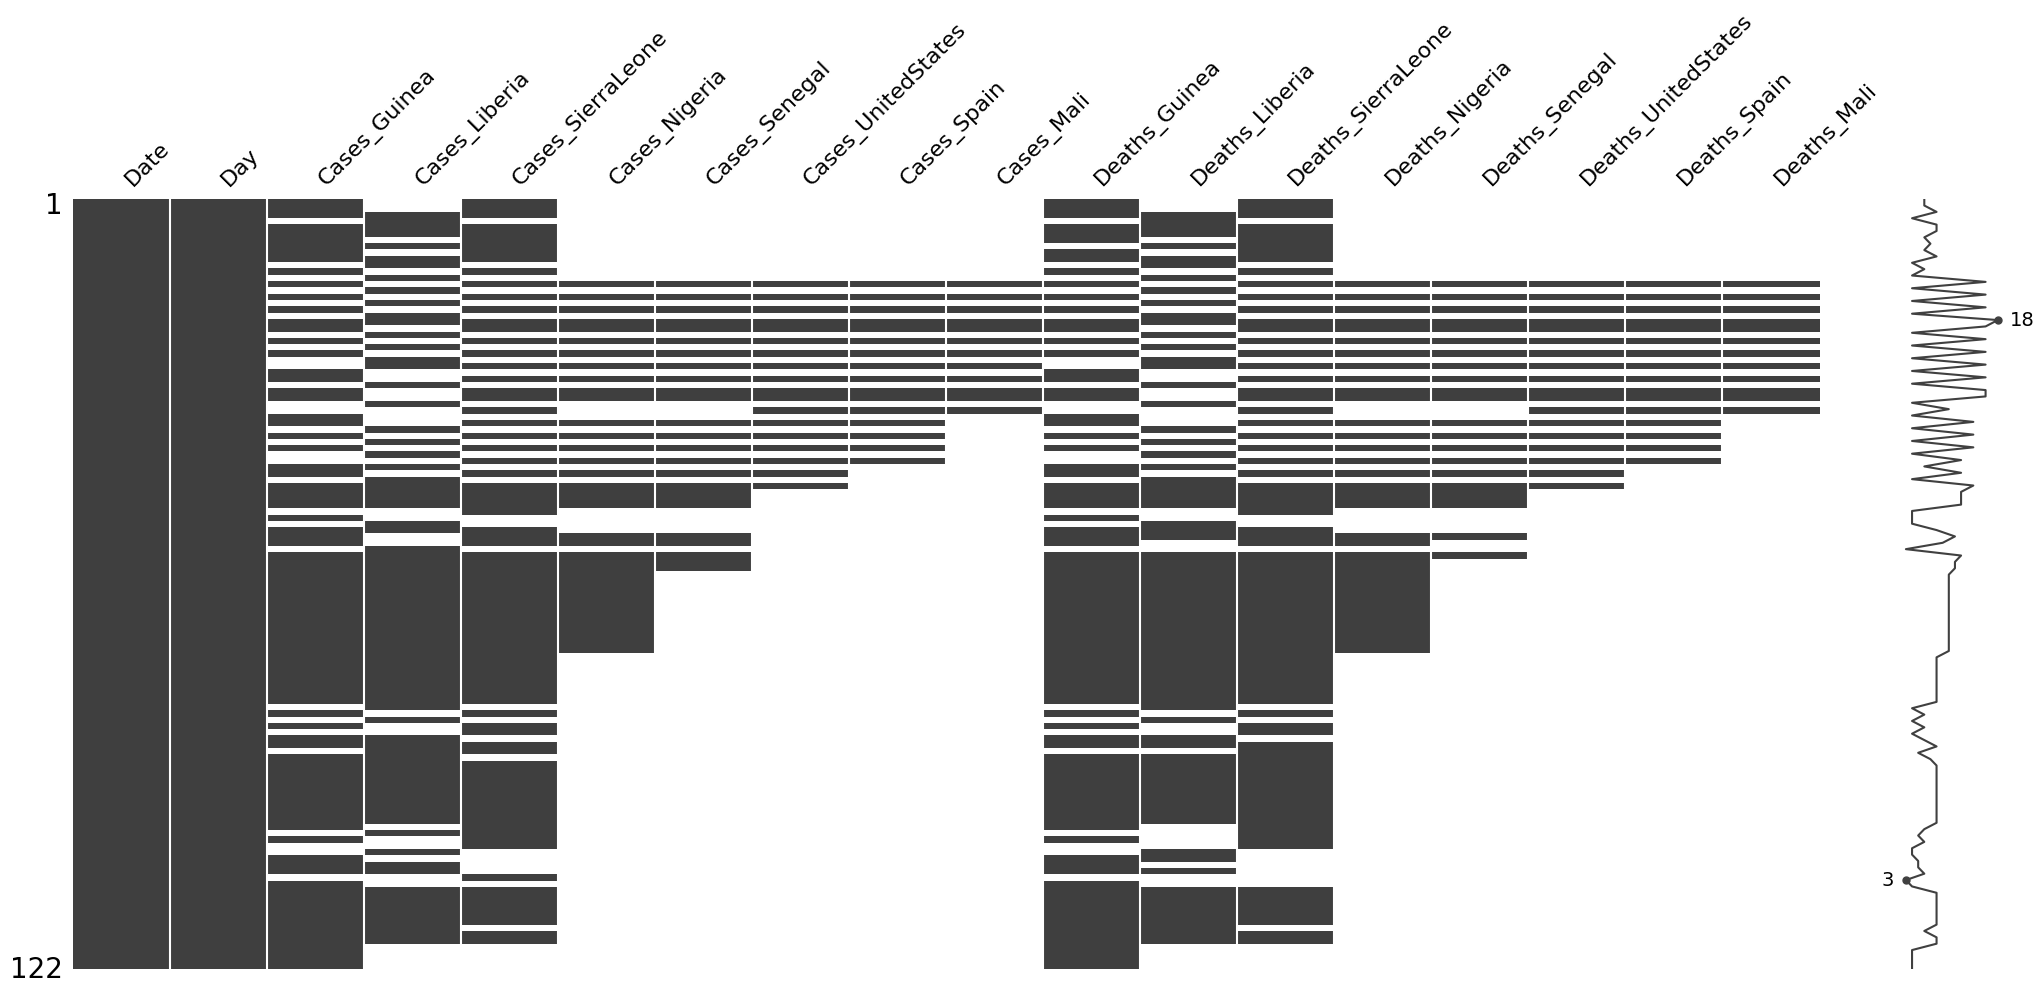

In [11]:
#결측치 시각화
msno.matrix(dfe)
plt.show()

## 결측치를 대체하는 방법
- 샘플 데이터만 뽑아서 어떤 식으로 작동하는지 확인

In [12]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#결측치가 어떤 식으로 바뀌는지 확인
ebola=dfe.iloc[0:15,0:5]

- 결측치를 버릴 경우

In [16]:
ebola.dropna() # 데이터가 깔끔하게 정리

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


- fillna(method = '') 문법

In [30]:
ebola['Cases_Liberia'].mean()

7960.111111111111

In [25]:
# case liberia 평균은 7960.111111111111
ebola['Cases_Liberia'].fillna(7960.111111111111).to_frame()

,Cases_Liberia
0,7960.111111
1,7960.111111
2,8166.000000
3,8157.000000
4,8115.000000
5,8018.000000
6,7960.111111
7,7977.000000
8,7960.111111
9,7862.000000


In [28]:
# case liberia 0으로 대체할 경우
ebola['Cases_Liberia'].fillna(0).to_frame()
# 원본데이터 저장은 안 됨

,Cases_Liberia
0,0.0
1,0.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,0.0
7,7977.0
8,0.0
9,7862.0


- ffill - 누락값이 나타나기 전의 값으로 누락값을 변경 
- bfill - 누락값이 나타나나 이후의 첫 번재 값으로 앞쪽의 누락값을 변경

In [31]:
ebola['Cases_Liberia'].fillna(method='ffill').to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,8018.0
7,7977.0
8,7977.0
9,7862.0


In [33]:
ebola.Cases_Liberia.to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,NaN
7,7977.0
8,NaN
9,7862.0


In [34]:
ebola['Cases_Liberia'].fillna(method='bfill').to_frame()

,Cases_Liberia
0,8166.0
1,8166.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7977.0
7,7977.0
8,7862.0
9,7862.0


- 문법
- 보간법 (interpolate) 
- interpolate(method='')
- 누락값 사이의 값을 평균으로 대체해서 만듬. 중간에 결측치가 있으면 보간법을 이용해서 결측치를 대체

In [35]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [36]:
ebola['Cases_Liberia'].interpolate().to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7997.5
7,7977.0
8,7919.5
9,7862.0


In [37]:
ebola['Cases_Liberia'].fillna(method='bfill').to_frame()

,Cases_Liberia
0,8166.0
1,8166.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7977.0
7,7977.0
8,7862.0
9,7862.0


### 보간법에 대해서 

method must be one of 

['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

<Axes: >

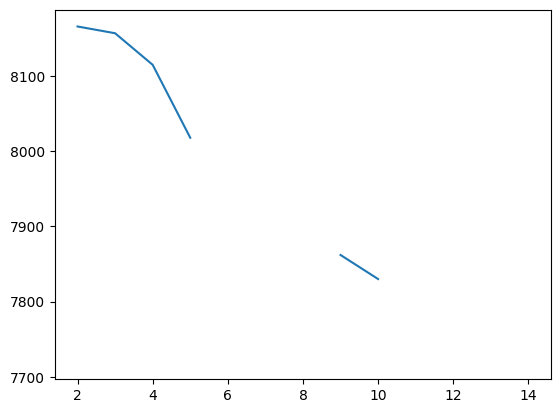

In [39]:
# 결측값이 있는 경우는 뚝 떨어진 값이 됨
ebola['Cases_Liberia'].plot()

<Axes: >

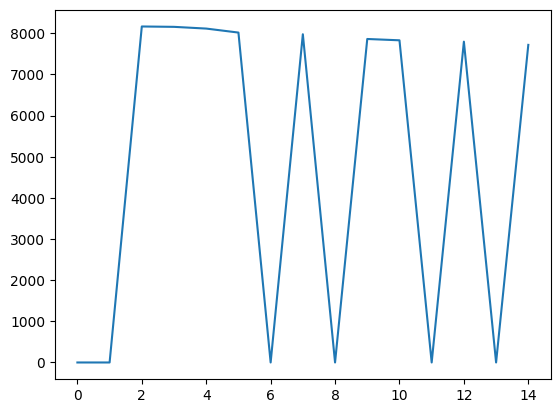

In [40]:
# 결측값이 있는 경우는 뚝 떨어진 값이 됨
ebola['Cases_Liberia'].fillna(0).plot()

<Axes: >

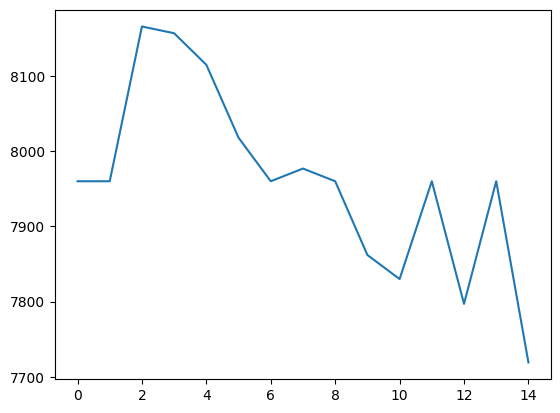

In [41]:
# 결측값이 있는 경우는 뚝 떨어진 값이 됨
ebola['Cases_Liberia'].fillna(7960.111111111111).plot()

<Axes: >

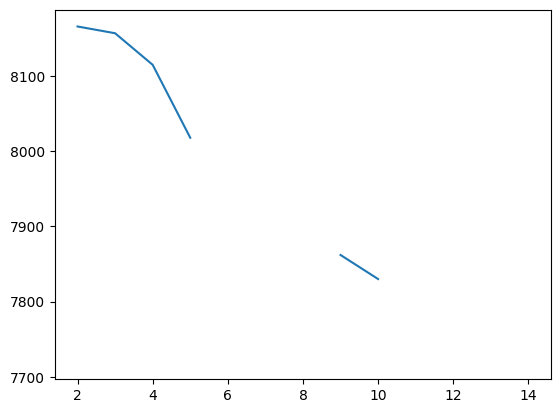

In [42]:
# 결측값이 있는 경우는 뚝 떨어진 값이 됨
ebola['Cases_Liberia'].plot()

- 선형 보간법
- 두 점사의 거리 구하는 공식 
- 1차원 두 점사이의 거리로 해당 누락값을 대체

<Axes: >

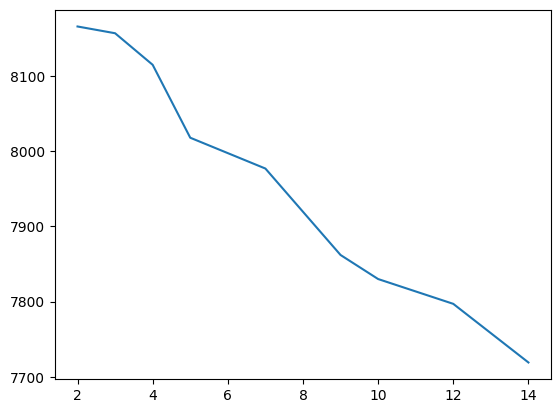

In [43]:
ebola['Cases_Liberia'].interpolate(method='linear').plot()

<Axes: >

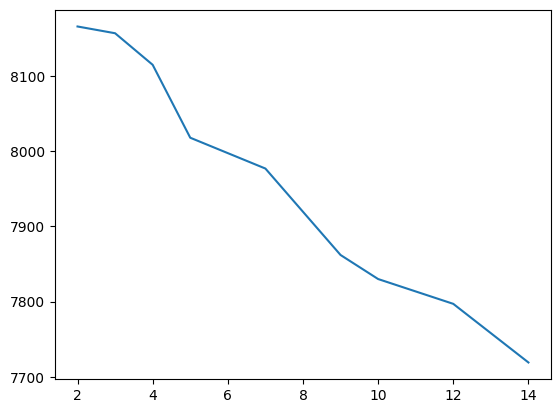

In [44]:
#1차 2차, 3차 항을 높이면서 보간
ebola['Cases_Liberia'].interpolate(method='slinear').plot()

<Axes: >

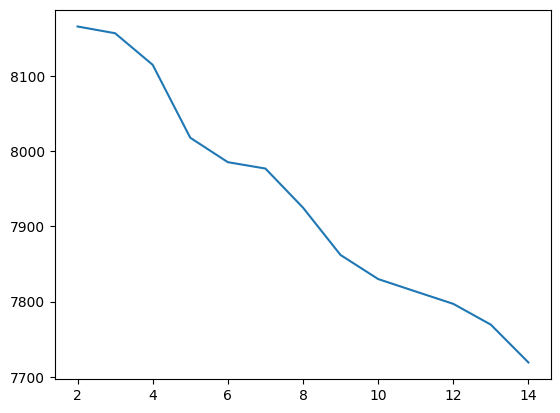

In [45]:
#1차 2차, 3차 항을 높이면서 보간
ebola['Cases_Liberia'].interpolate(method='cubic').plot()

<Axes: >

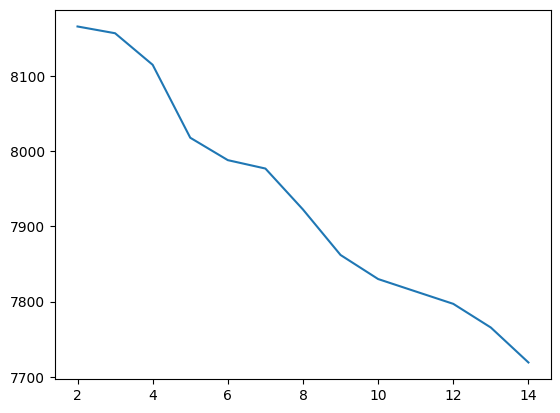

In [47]:
#spline
#기존에는 1차원 차원으로 생각해서 보간을 했다면
#spline 통해서 order 차수 높이면
# 2차원 이상으로 보간

ebola['Cases_Liberia'].interpolate(method='spline',order=2).plot()

In [54]:
dfe['Date']=pd.to_datetime(dfe['Date'])

df_e=dfe.set_index('Date')

In [52]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [63]:
df_e.iloc[0:15,0:5]['Cases_Liberia'].interpolate(method='time').to_frame() #시간에 따른 결측치 대체
# 시계열로 대체를 할 때는 양쪽의 값을 가지고 Na값을 대체

,Cases_Liberia
Date,
2015-01-05,NaN
2015-01-04,NaN
2015-01-03,8166.000000
2015-01-02,8157.000000
2014-12-31,8115.000000
2014-12-28,8018.000000
2014-12-27,8007.750000
2014-12-24,7977.000000
2014-12-21,7890.750000


In [65]:
ebola['Cases_Liberia']

0        NaN
1        NaN
2     8166.0
3     8157.0
4     8115.0
5     8018.0
6        NaN
7     7977.0
8        NaN
9     7862.0
10    7830.0
11       NaN
12    7797.0
13       NaN
14    7719.0
Name: Cases_Liberia, dtype: float64